## Algerian forest classification problem

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Algerian_forest.csv",header=1)

In [3]:
df[120:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [4]:
df.drop([122,123],inplace=True)

In [5]:
df[120:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [6]:
df.reset_index(drop=True,inplace=True)

In [7]:
df[120:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [8]:
## Putting feature for region
df.loc[:122,'Region'] = 0
df.loc[122:,'Region'] = 1

In [9]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4    RH          244 non-null    object 
 5    Ws          244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.7+ KB


Values are numeric still pandas is not recognizing it as numeric so we have to convert it in numeric

In [11]:
##Checking column names
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [12]:
#removing space from classes feature name
df.rename(columns={'Classes  ':'Classes',' RH':'RH',' Ws':'Ws','Rain ':'Rain'},inplace=True)
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [13]:
df['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [14]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

In [15]:
##Removing space from the values
df.Classes = df.Classes.str.strip()

In [16]:
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [17]:
##encoding classes categorical feature
df.Classes = np.where(df['Classes'] == 'not fire',0,1)

In [18]:
df['Classes'].unique()

array([0, 1])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4   RH           244 non-null    object 
 5   Ws           244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      244 non-null    int32  
 14  Region       244 non-null    float64
dtypes: float64(1), int32(1), object(13)
memory usage: 27.8+ KB


In [20]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0,0.0


In [21]:
df.year.unique()

array(['2012'], dtype=object)

In [22]:
##Dropping year column as its same year data and year dont matter in this case
df.drop('year',axis = 1,inplace=True)

In [23]:
df.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,02,06,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0,0.0
2,03,06,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,04,06,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0,0.0
4,05,06,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0,0.0


In [24]:
df.isnull().sum()

day            0
month          0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [25]:
df.drop([df[df['DC']=='14.6 9'].index[0]],inplace=True)

In [26]:
df['day'] = df['day'].astype('int64')
df['month'] = df['month'].astype('int64')
df['Temperature'] = df['Temperature'].astype('int64')
df['RH'] = df['RH'].astype('int64')
df['Ws'] = df['Ws'].astype('int64')
df['Rain'] = df['Rain'].astype('float64')
df['FFMC'] = df['FFMC'].astype('float64')
df['DMC'] = df['DMC'].astype('float64')
df['DC'] = df['DC'].astype('float64')
df['ISI'] = df['ISI'].astype('float64')
df['BUI'] = df['BUI'].astype('float64')
df['FWI'] = df['FWI'].astype('float64')
df['Region'] = df['Region'].astype('int64')

In [27]:
df.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   Temperature  243 non-null    int64  
 3   RH           243 non-null    int64  
 4   Ws           243 non-null    int64  
 5   Rain         243 non-null    float64
 6   FFMC         243 non-null    float64
 7   DMC          243 non-null    float64
 8   DC           243 non-null    float64
 9   ISI          243 non-null    float64
 10  BUI          243 non-null    float64
 11  FWI          243 non-null    float64
 12  Classes      243 non-null    int32  
 13  Region       243 non-null    int64  
dtypes: float64(7), int32(1), int64(6)
memory usage: 27.5 KB


In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4
ISI,243.0,4.742387,4.154234,0.0,1.40,3.5,7.25,19.0


There are outliers in Rain and DC feature

In [30]:
df.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000,-0.000369,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.202840,0.000821
month,-0.000369,1.000000,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.024004,0.001857
Temperature,0.097227,-0.056781,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.076034,-0.041252,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,0.047812,-0.039880,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.112523,0.034822,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.224956,0.017030,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.491514,0.067943,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.527952,0.126511,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.180543,0.065608,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197


BWI and DMC are highly correlated so we can drop any one of them

<AxesSubplot:>

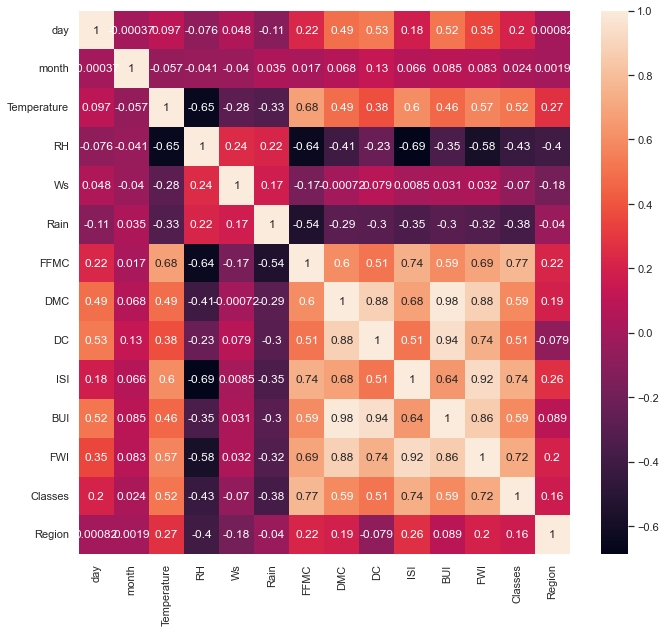

In [31]:
sns.set(rc={'figure.figsize':(11,10)})
sns.heatmap(df.corr(),annot=True)

In [42]:
df.Classes.value_counts()

1    137
0    106
Name: Classes, dtype: int64

#### Dataset is imbalance

In [32]:
## Train data for independent feature
X = df.drop(['Classes'],axis=1)

In [33]:
## train data for dependent feature
y = df['Classes']

In [34]:
X.shape

(243, 13)

In [35]:
y.shape

(243,)

In [36]:
## splitting train and test data using sklearn trauib test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

### Training Logistic Regression model

#### Scalling train data

In [37]:
## standardization of independent feature for gradient descent process
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
X_train

array([[-0.18998654,  1.40355772, -1.12656349, ..., -0.20093835,
        -0.19543585,  0.9877296 ],
       [-1.21212815,  0.49039968,  0.52256258, ..., -0.38763567,
        -0.14405961, -1.01242284],
       [ 0.26429862, -0.42275835,  0.24770824, ...,  0.43916677,
         0.24126219,  0.9877296 ],
       ...,
       [-1.66641331,  1.40355772, -1.95112653, ..., -1.03440854,
        -0.91470322, -1.01242284],
       [ 1.5135828 , -0.42275835,  0.52256258, ...,  0.14578526,
         0.47245527,  0.9877296 ],
       [-0.53070041,  1.40355772, -0.5768548 , ..., -0.99440197,
        -0.8890151 , -1.01242284]])

### Training Logistic regression model

In [39]:
#importing modules
from sklearn.linear_model import LogisticRegression
#creating model object
regression = LogisticRegression()
#training model
regression.fit(X_train,y_train)
#making predcitons
reg_pred = regression.predict(X_test)

In [40]:
#model predictions
reg_pred

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1])

### Accuracy score

In [48]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test,reg_pred)
acc_score

0.9506172839506173

### Confusion matrix

In [41]:
## Accuracy by confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,reg_pred)
mat

array([[31,  2],
       [ 2, 46]], dtype=int64)

In [43]:
tp = mat[0][0]
tn = mat[1][1]
fp = mat[0][1]
fn = mat[1][0]

In [45]:
##accuracy claculation
acc = (tp+tn)/(tp+fp+tn+fn)
acc

0.9506172839506173

### Precision score

In [44]:
## precision calculation
precision = tp/(tp+fp)
precision

0.9393939393939394

### Recall score

In [46]:
## recall calculation
recall = tp/(tp+fn)
recall

0.9393939393939394

### F1 Score

In [47]:
## f1-score calculation

f1 = 2 * precision * recall / (precision + recall)
f1

0.9393939393939394

#### All of the score are above 90% means our model is working very well